In [1]:
import numpy as np
import matplotlib.pyplot as plt

from snn.layers import SCTNLayer
from snn.spiking_network import SpikingNetwork
from snn.spiking_neuron import create_SCTN, IDENTITY
from snn.resonator import test_resonator_on_chirp, create_excitatory_inhibitory_resonator

<string>:3: NumbaTypeSafetyWarning: unsafe cast from int64 to int32. Precision may be lost.


argmax = 13.945494852450818


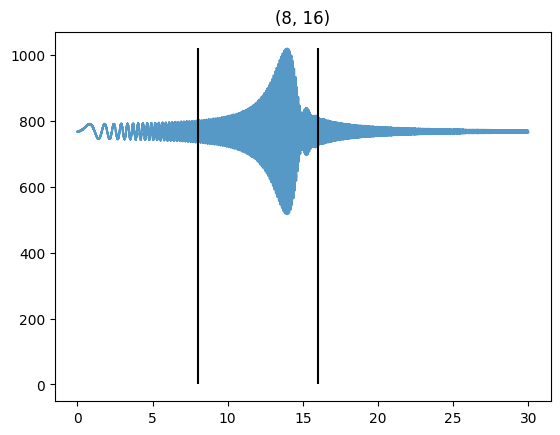

In [2]:
from snn.resonator import create_base_resonator

spectrum = 30
clk_freq = 153600
spikes_window_size = clk_freq//100      # 10ms window
step = 1 / (clk_freq)
bands = {
    # (3, 5): [2],
    # (5, 8): [2.5],
    (8, 16): [10.4],
}
for band, freqs in bands.items():
    freqs.reverse()
    y_spikes_sum = 0
    for freq in freqs:
        # resonator = create_excitatory_inhibitory_resonator(freq, clk_freq)
        resonator = create_base_resonator(freq, clk_freq)
        resonator.log_out_spikes(-1)

        test_size = int(spectrum / step)
        test_resonator_on_chirp(
            resonator,
            start_freq=0,
            test_size=test_size,
            clk_freq=clk_freq,
        )

        spikes_neuron = resonator.neurons[-1]
        y_events = spikes_neuron.out_spikes()
        y_spikes = np.zeros(test_size)
        y_spikes[y_events] = 1
        y_spikes_sum += np.convolve(y_spikes, np.ones(spikes_window_size, dtype=int), 'valid')
    x = np.linspace(0, spectrum, len(y_spikes_sum))
    plt.plot(x, y_spikes_sum, alpha=.75)
    print(f'argmax = {x[np.argmax(y_spikes_sum)]}')
    plt.vlines(band[0], 0, max(y_spikes_sum), colors='k')
    plt.vlines(band[1], 0, max(y_spikes_sum), colors='k')
    plt.title(band)
    plt.show()

clk_freq * 1, argmax = 15.96108120819398
clk_freq * 2, argmax = 7.967217497913189
clk_freq * 3, argmax = 5.308524228309232
clk_freq * 4, argmax = 3.980286306296914
clk_freq * 5, argmax = 3.183697986157438
clk_freq * 6, argmax = 2.652786704419122
clk_freq * 7, argmax = 2.273636627560743
clk_freq * 8, argmax = 1.9893135811796583
clk_freq * 9, argmax = 1.7681968437384217
clk_freq * 10, argmax = 1.5913181998166055
clk_freq * 11, argmax = 1.4466090576689907
clk_freq * 12, argmax = 1.3260248072381218
clk_freq * 13, argmax = 1.223996737945627
clk_freq * 14, argmax = 1.1365475782924506
clk_freq * 15, argmax = 1.0607608982551677


KeyboardInterrupt: 

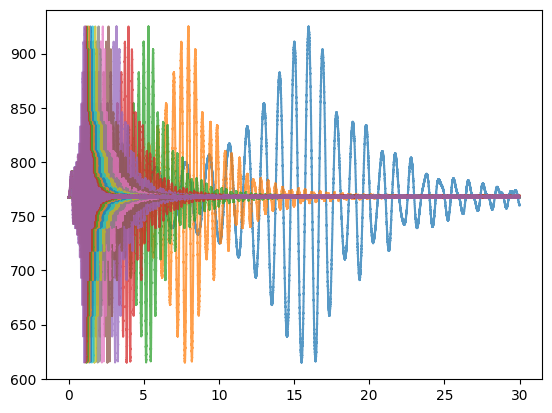

In [114]:
from snn.resonator import create_base_resonator

spectrum = 30
clk_freq = 15360
spikes_window_size = clk_freq//10      # 10ms window
step = 1 / (clk_freq)
freq = 1.04
# resonator = create_excitatory_inhibitory_resonator(freq, clk_freq)
for i in range(1, 20):
    resonator = create_base_resonator(freq, clk_freq)
    resonator.log_out_spikes(-1)

    test_size = int(spectrum / step * i)
    test_resonator_on_chirp(
        resonator,
        start_freq=0,
        test_size=test_size,
        clk_freq=clk_freq
    )

    spikes_neuron = resonator.neurons[-1]
    y_events = spikes_neuron.out_spikes()
    y_spikes = np.zeros(test_size)
    y_spikes[y_events] = 1
    y_spikes_sum = np.convolve(y_spikes, np.ones(spikes_window_size, dtype=int), 'valid')
    x = np.linspace(0, spectrum, len(y_spikes_sum))
    plt.plot(x, y_spikes_sum, alpha=.75)
    print(f'clk_freq * {i}, argmax = {x[np.argmax(y_spikes_sum)]}')
